In [63]:
from neuralop.models import FNO
import torch
import pathlib

import acoustic_no
from importlib import reload

from acoustic_no.data import AcousticDataset
from acoustic_no.cno.cno_model import CNOModel 

from acoustic_no.models import UFNO
#from acoustic_no.utils.eval import evaluate_model, plot_initial_conditions, plot_inference_results

reload(acoustic_no.utils.eval)
import acoustic_no.utils.eval as eval_utils



In [3]:
# Use the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the dataset
dataset = AcousticDataset(
    data_dir=pathlib.Path("../resources/small_dataset/testing"),
    depth=64
)
print(f"Dataset size: {len(dataset)}")

depth = dataset.depth
print(f"Dataset depth: {depth}")


Using device: cuda
Dataset size: 8757
Dataset depth: 64


In [89]:
fno = FNO(
    n_modes=(16, 16),
    in_channels=depth * 3 + 1,
    out_channels=depth,
    n_layers=8,
    hidden_channels=128,
    projection_channel_ratio=2,
)
fno.load_state_dict(
    torch.load(
        "../resources/models/fno_baseline/best_model_state_dict.pt",
        map_location=device,
        weights_only=False
    )
)
fno.to(device)

tfno = FNO(
    n_modes=(16, 16),
    in_channels=depth * 3 + 1,
    out_channels=depth,
    n_layers=8,
    hidden_channels=128,
    projection_channel_ratio=2,
    factorization="Tucker",
    rank=16
)
tfno.load_state_dict(
    torch.load(
        "../resources/models/tfno/best_model_state_dict.pt",
        map_location=device,
        weights_only=False
    )
)
tfno.to(device)

cno = CNOModel(
    input_channels=depth * 3 + 1,
    hidden_channels=[128, 128, 256],
    layer_sizes=[3, 3, 4],
    output_channels=depth
)
cno.load_state_dict(
    torch.load(
        "../resources/models/cno/best_model.pth",
        map_location=device
    )
)
cno.to(device)

ufno = UFNO(
    n_modes=(16, 16),
    in_channels=depth * 3 + 1,
    out_channels=depth,
    width=64,
    n_layers=6,
)
state_dict = torch.load("../resources/models/ufno/best_model_state_dict_64x64_h1.pt", map_location=device, weights_only=False)
if "_metadata" in state_dict:
    del state_dict["_metadata"]
ufno.load_state_dict(state_dict)
ufno.to(device)

pass


In [ ]:
models = {
    "FNO": fno,
    "TFNO": tfno,
    "CNO": cno
}
for k, v in models.items():
    eval_utils.evaluate_models({k: v}, dataset, device)


Evaluating: 100%|██████████| 8757/8757 [01:27<00:00, 100.34sample/s]


----------------------------------------
Average results for model 'FNO':
  MSE:         13.932867
  L2 Loss:     49.230886
  H1 Loss:     51.069296
  Relative L2: 0.807822
  Max Error:   50.923358


Evaluating: 100%|██████████| 8757/8757 [02:00<00:00, 72.78sample/s]


----------------------------------------
Average results for model 'TFNO':
  MSE:         12.410941
  L2 Loss:     45.313247
  H1 Loss:     47.357576
  Relative L2: 0.741710
  Max Error:   53.267081


Evaluating: 100%|██████████| 8757/8757 [01:31<00:00, 95.73sample/s]

----------------------------------------
Average results for model 'CNO':
  MSE:         1.980019
  L2 Loss:     20.405886
  H1 Loss:     21.855785
  Relative L2: 0.335611
  Max Error:   41.188366


In [ ]:
models = {
    "FNO": fno,
    "TFNO": tfno,
    "CNO": cno
}
for k, v in models.items():
    eval_utils.evaluate_models({k: v}, dataset, device)


Evaluating: 100%|██████████| 8757/8757 [01:44<00:00, 83.58sample/s]


----------------------------------------
Average results for model 'FNO':
  MSE:         13.932867
  L2 Loss:     49.230886
  H1 Loss:     51.069296
  Relative L2: 0.807822
  Max Error:   50.923358


Evaluating: 100%|██████████| 8757/8757 [02:24<00:00, 60.57sample/s]


----------------------------------------
Average results for model 'TFNO':
  MSE:         18.452117
  L2 Loss:     52.055132
  H1 Loss:     54.566852
  Relative L2: 0.852592
  Max Error:   52.425806


Evaluating: 100%|██████████| 8757/8757 [01:44<00:00, 83.73sample/s]

----------------------------------------
Average results for model 'CNO':
  MSE:         1.980019
  L2 Loss:     20.405886
  H1 Loss:     21.855785
  Relative L2: 0.335611
  Max Error:   41.188366


In [ ]:
eval_utils.evaluate_models({"UFNO": ufno}, dataset, device)


Evaluating:   8%|▊         | 682/8757 [00:19<03:53, 34.63sample/s]


KeyboardInterrupt: 

In [ ]:
eval_utils.evaluate_models({"TFNO": tfno}, dataset, device)


Evaluating: 100%|██████████| 8757/8757 [02:53<00:00, 50.51sample/s]

----------------------------------------
Average results for model 'TFNO':
  MSE:         12.744322
  L2 Loss:     46.300972
  H1 Loss:     47.970950
  Relative L2: 0.759925
  Max Error:   52.737010


{'TFNO': {'mse': 12.744321942470641,
  'l2_loss': 46.30097212121137,
  'h1_loss': 47.97095032234885,
  'rel_l2': 0.7599252124375591,
  'max_error': 52.73700973118251}}

In [ ]:
eval_utils.evaluate_models({"TFNO": tfno}, dataset, device)


Evaluating: 100%|██████████| 8757/8757 [03:01<00:00, 48.32sample/s]

----------------------------------------
Average results for model 'TFNO':
  MSE:         12.213899
  L2 Loss:     45.084384
  H1 Loss:     47.055058
  Relative L2: 0.738366
  Max Error:   53.048195


{'TFNO': {'mse': 12.213898633881438,
  'l2_loss': 45.08438439416575,
  'h1_loss': 47.05505789547352,
  'rel_l2': 0.7383658975257277,
  'max_error': 53.04819514673296}}

In [ ]:
eval_utils.evaluate_models({"TFNO": tfno}, dataset, device)


Evaluating: 100%|██████████| 8757/8757 [02:01<00:00, 71.85sample/s]

----------------------------------------
Average results for model 'TFNO':
  MSE:         12.410941
  L2 Loss:     45.313247
  H1 Loss:     47.357576
  Relative L2: 0.741710
  Max Error:   53.267081


{'TFNO': {'mse': 12.410940789528581,
  'l2_loss': 45.31324692007694,
  'h1_loss': 47.35757640617765,
  'rel_l2': 0.7417100095593713,
  'max_error': 53.26708091850407}}

In [ ]:
models = {
    "FNO": fno,
    "TFNO": tfno,
    "CNO": cno
}

results = eval_utils.evaluate_models(models, dataset, device)


Evaluating: 100%|██████████| 8757/8757 [05:51<00:00, 24.90sample/s]

----------------------------------------
Average results for model 'FNO':
  MSE:         13.932867
  L2 Loss:     49.230886
  H1 Loss:     51.069296
  Relative L2: 0.807822
  Max Error:   50.923358
----------------------------------------
Average results for model 'TFNO':
  MSE:         25.597561
  L2 Loss:     60.616568
  H1 Loss:     60.043617
  Relative L2: 0.996572
  Max Error:   58.003128
----------------------------------------
Average results for model 'CNO':
  MSE:         1.980019
  L2 Loss:     20.405886
  H1 Loss:     21.855785
  Relative L2: 0.335611
  Max Error:   41.188366


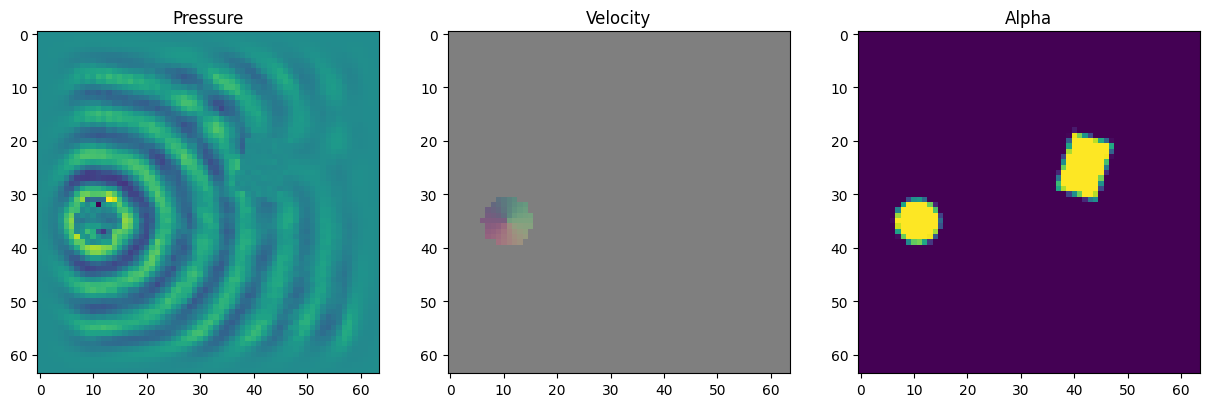

In [5]:
eval_utils.plot_initial_conditions(dataset)


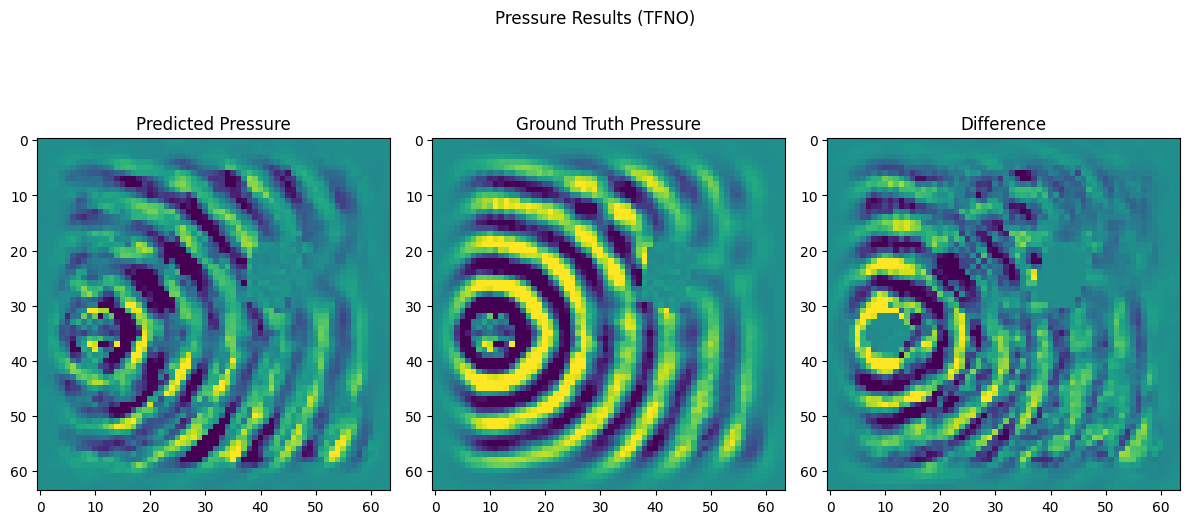

In [ ]:
eval_utils.plot_inference_results(tfno, dataset,
                                  path=None, kind="pressure", name="TFNO")


Sampled 8757 initial conditions.


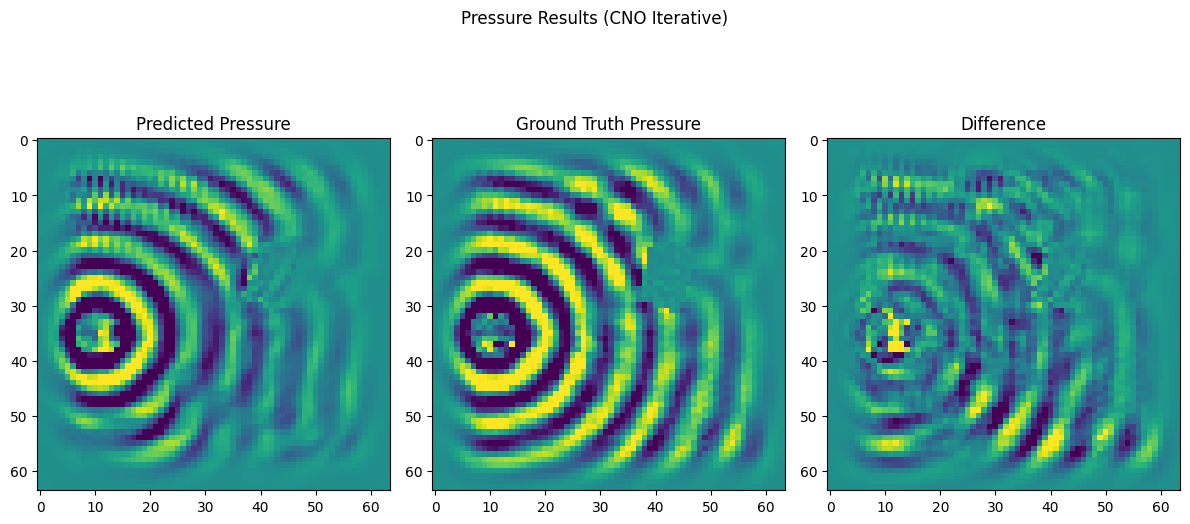

In [ ]:
# Plot pressure for middle sample (generated iteratively)
#eval_utils.sample_iterative(cno, dataset, device, kind="pressure", name="CNO")

# Warning: It will probably take >30 minutes to generate a full animation
#eval_utils.sample_iterative(cno, dataset, device, kind="animation", name="CNO")

# Plot error evolution/distribution for entire dataset (generated iteratively)
#eval_utils.sample_iterative(cno, dataset, device, kind="pressure", name="CNO Iterative", compute_metrics=True)

# Plot error evolution/distribution for middle sample (generated iteratively)
#eval_utils.sample_iterative(cno, dataset, device, kind="error", name="CNO", index=len(dataset) // 2)


Sampled 8757 initial conditions.


Evaluating: 100%|██████████| 8757/8757 [00:03<00:00, 2623.84sample/s]


----------------------------------------
Average results for model 'CNO Iterative (iterative)':
  MSE:       10.404075
  L2 Loss:   0.783906
  H1 Loss:   0.815616
  Max Error: 47.042977
Plotting error evolution...
Plotting error distribution...


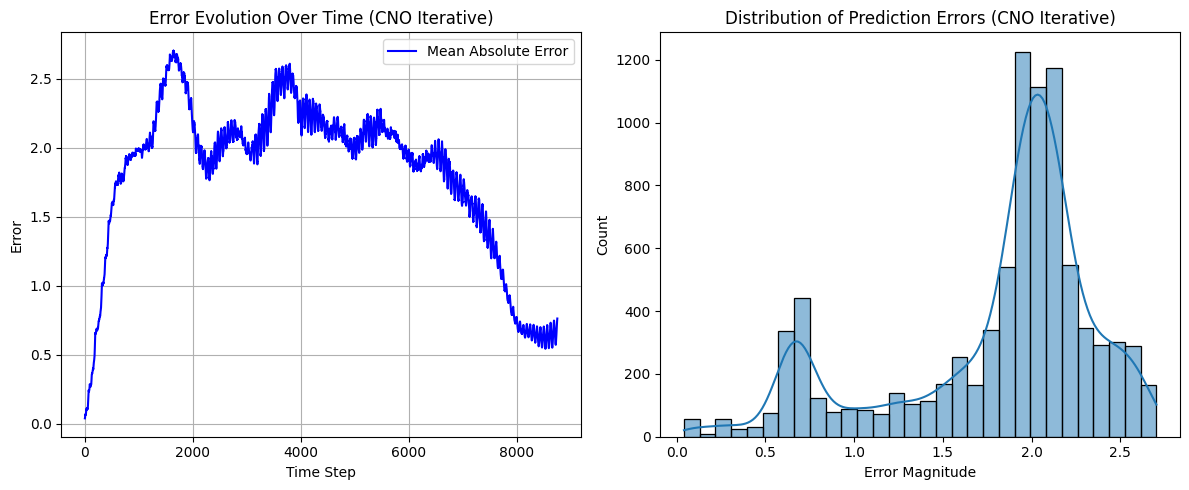

Error plots saved.


array([0.04060352, 0.04253133, 0.04415875, ..., 0.7526142 , 0.7562388 ,
       0.76347977], shape=(8757,), dtype=float32)

In [ ]:
# Plot error evolution/distribution for entire dataset (generated iteratively)
eval_utils.sample_iterative(cno, dataset, device, kind="error", name="CNO Iterative", compute_metrics=True)


Sampled 8757 initial conditions.


Evaluating: 100%|██████████| 8757/8757 [00:03<00:00, 2596.98sample/s]


----------------------------------------
Average results for model 'UFNO (iterative)':
  MSE:       24.361681
  L2 Loss:   0.988608
  H1 Loss:   0.994044
  Max Error: 44.583254
Plotting error evolution...
Plotting error distribution...


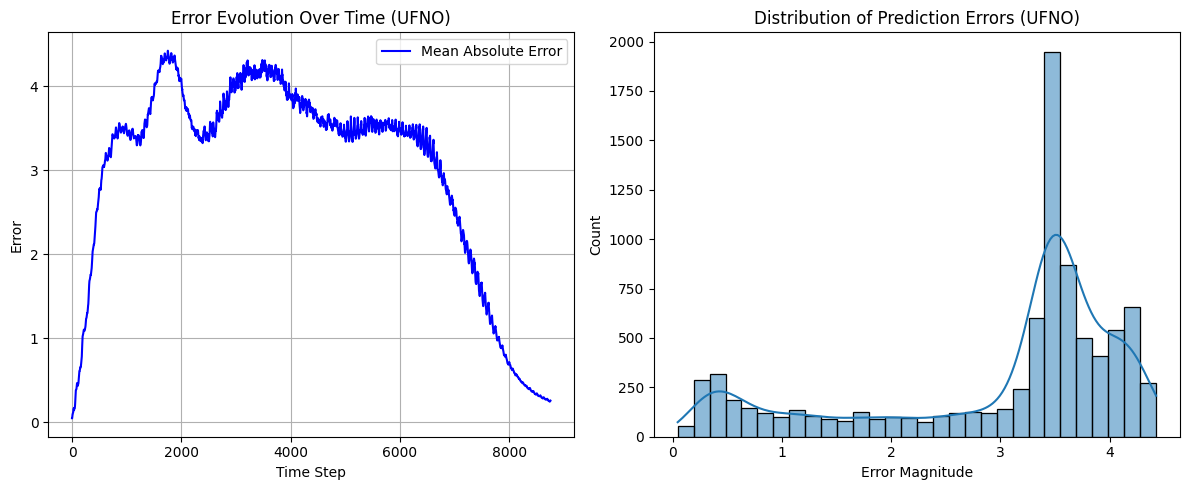

Error plots saved.


array([0.04417609, 0.04395024, 0.05059959, ..., 0.25428438, 0.2548515 ,
       0.25517565], shape=(8757,), dtype=float32)

In [ ]:
# Plot error evolution/distribution for entire dataset (generated iteratively)
eval_utils.sample_iterative(ufno, dataset, device, kind="error", name="UFNO", compute_metrics=True)


In [ ]:
import numpy as np
models = {
    "FNO": fno,
    "TFNO": tfno,
    "U-FNO": ufno,
    "CNO": cno
}
error_evos = {
    k: np.mean(np.array([
        eval_utils.plot_inference_results(v, dataset, path=None, kind="error", name=k, index=i, show_plot=False)
        for i in range(0, len(dataset), 16)
    ]), axis=0)
    for k, v in models.items()
}


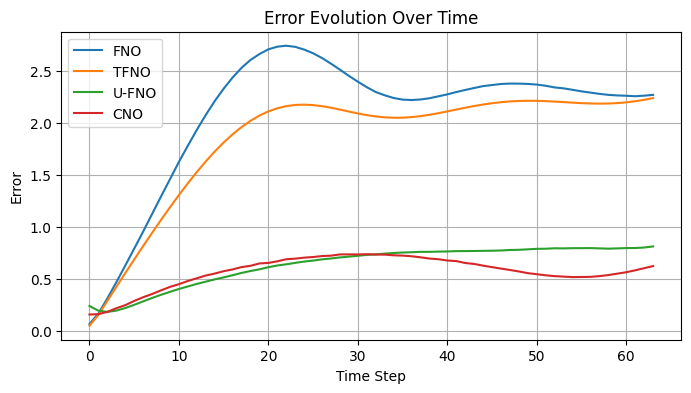

In [ ]:
for k, v in error_evos.items():
    plt.plot(range(depth), v, label=k)
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Error')
plt.title('Error Evolution Over Time')
plt.gcf().set_size_inches(8, 4)
plt.grid()
plt.show()


In [ ]:
error_evos_iter = {
    k: eval_utils.sample_iterative(v, dataset, device, kind="error", name=k, compute_metrics=False) for k, v in models.items()
}


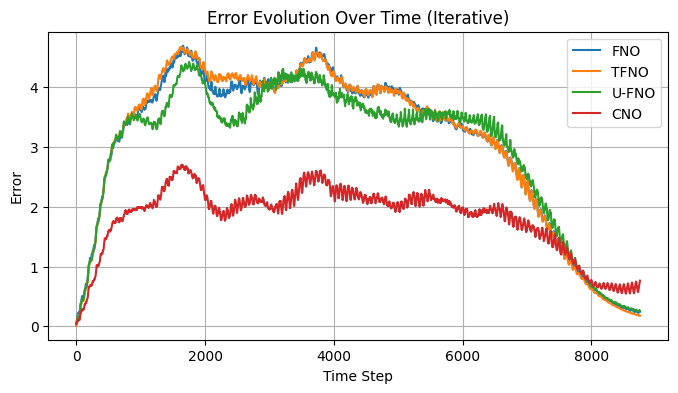

In [ ]:
for k, v in error_evos_iter.items():
    plt.plot(range(len(dataset)), v, label=k)
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Error')
plt.title('Error Evolution Over Time (Iterative)')
plt.gcf().set_size_inches(8, 4)
plt.grid()
plt.show()


In [ ]:
models = {
    "FNO": fno,
    "TFNO": tfno,
    "U-FNO": ufno,
    "CNO": cno
}

for k, v in models.items():
    print('-' * 40)
    print(f'Model {k}')
    print(f'Number of parameters (total):     {sum(p.numel() for p in v.parameters())}')
    print(f'Number of parameters (trainable): {sum(p.numel() for p in v.parameters() if p.requires_grad)}')


----------------------------------------
Model FNO
Number of parameters (total):     19272640
Number of parameters (trainable): 19272640
----------------------------------------
Model TFNO
Number of parameters (total):     958528
Number of parameters (trainable): 958528
----------------------------------------
Model U-FNO
Number of parameters (total):     16631040
Number of parameters (trainable): 16631040
----------------------------------------
Model CNO
Number of parameters (total):     8885440
Number of parameters (trainable): 8885440


# Testing (ignore)

In [ ]:
model = fno  # Change this to fno, tfno, or cno to evaluate models
model.to(device)
model.eval()

y_true = []
y_pred = []
i = 0
init_cond = dataset[0]["x"][0, :, :].detach().cpu()

while i < len(dataset):
    data = dataset[i]
    x = data["x"].detach().clone()
    p = data["y"]
    x[0, :, :] = init_cond
    with torch.no_grad():
        pred = model(x.unsqueeze(0).to(device)).squeeze()
    init_cond = pred[-1, :, :].detach().cpu()

    y_true.append(p[:-1].cpu())
    y_pred.append(pred[:-1].cpu())

    i += dataset.depth - 1  # Skip to the next initial condition
y_true = torch.stack(y_true).flatten(0, 1)[:len(dataset)]
y_pred = torch.stack(y_pred).flatten(0, 1)[:len(dataset)]

y_true.shape, y_pred.shape


(torch.Size([8757, 64, 64]), torch.Size([8757, 64, 64]))

In [ ]:
p.shape, pred.shape


(torch.Size([64, 64, 64]), torch.Size([64, 64, 64]))

In [ ]:
torch.linalg.norm(x[0] - p[0])
x.shape


torch.Size([193, 64, 64])